In [218]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [219]:
x_test = pd.read_csv('_test.csv')
x_train = pd.read_csv('_train.csv')
y_train = x_train['label']
x_train = x_train.drop('label', axis=1)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [222]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(42000, 784)
(28000, 784)
(42000,)


In [223]:
# # Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (42000, 28, 28, 1)
x_test shape: (28000, 28, 28, 1)


In [224]:
# # Importing the required Keras modules containing model and layers
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# # Creating a Sequential Model and adding the layers
# input_shape = (28,28,1)
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(64, activation=tf.nn.relu))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation=tf.nn.softmax))

In [225]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [226]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [227]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
gen = image.ImageDataGenerator()
gen = ImageDataGenerator(
        rotation_range=3,
        zoom_range=0.1,
        width_shift_range=0.05,
        height_shift_range=0.05)

from sklearn.model_selection import train_test_split
x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

train_gen = gen.flow(x_train, y_train, batch_size=128)
history = model.fit(train_gen, epochs=15, validation_data = (x_val, y_val), verbose=1)

Epoch 1/30
263/263 [==============================] - 24s 90ms/step - loss: 0.4020 - accuracy: 0.8716 - val_loss: 0.1358 - val_accuracy: 0.9567
Epoch 2/30
263/263 [==============================] - 24s 90ms/step - loss: 0.1002 - accuracy: 0.9693 - val_loss: 0.0452 - val_accuracy: 0.9852
Epoch 3/30
263/263 [==============================] - 24s 91ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 4/30
263/263 [==============================] - 24s 91ms/step - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0309 - val_accuracy: 0.9906
Epoch 5/30
263/263 [==============================] - 24s 90ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch 6/30
263/263 [==============================] - 24s 90ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0265 - val_accuracy: 0.9907
Epoch 7/30
263/263 [==============================] - 23s 88ms/step - loss: 0.0325 - accuracy: 0.9905 - val_loss: 0.0267 - val_accuracy:

In [228]:
# x_val = x_train[:10000]
# partial_x_train = x_train[10000:]

# y_val = y_train[:10000]
# partial_y_train = y_train[10000:]

# #model.fit(x=x_train,y=y_train, epochs=3, batch_size=128)
# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=15,
#                     batch_size=64,
#                     validation_data=(x_val, y_val),
#                     verbose=1)

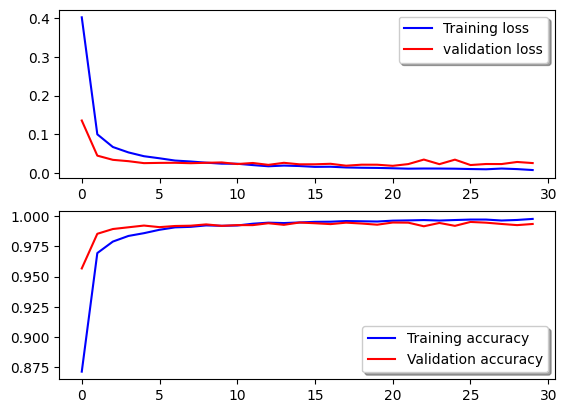

In [229]:
# Evaluate the model
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# #neural network result
# plt.clf()   # clear figure
# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']
# epochs = range(1, len(acc) + 1)

# epochs = range(1, len(acc) + 1)
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.show()

In [75]:
# from keras.preprocessing import image
# gen = image.ImageDataGenerator()

# from sklearn.model_selection import train_test_split
# X = x_train
# y = y_train
# X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.80, random_state=42)
# batches = gen.flow(X_train, y_train, batch_size=64)
# val_batches=gen.flow(X_val, y_val, batch_size=64)

# model.optimizer.lr=0.01
# gen = image.ImageDataGenerator()
# batches = gen.flow(X, y, batch_size=64)
# history=model.fit(generator=batches, steps_per_epoch=len(X_train)//64, epochs=10)

In [213]:
model.evaluate(x_train, y_train)

1050/1050 [==============================] - 8s 8ms/step - loss: 0.0068 - accuracy: 0.9978


[0.006816604174673557, 0.9977976083755493]

In [214]:
predictions = model.predict(x_test)

875/875 [==============================] - 7s 8ms/step


In [215]:
predictions = pd.DataFrame(predictions)
result = np.argmax(predictions, axis=1)
result = pd.DataFrame(result)
result.head()

,0
0,2
1,0
2,9
3,0
4,3


In [216]:
df_test = pd.read_csv('sample_submission.csv')
df_test = pd.concat([df_test, result],axis=1)
df_test = df_test.drop(columns=['Label'])
df_test = df_test.rename(columns = {0:'Label'})
df_test = df_test[['ImageId', 'Label']]
df_test

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [217]:
# save to file
df_test.to_csv('submission.csv', index=False)

In [194]:
# predictions = []

# for i in range(len(x_test)):
#     pred = model.predict(x_test[i].reshape(1, 28, 28, 1), verbose=0)
#     predictions.append(np.argmax(pred))
#     print(f"Writing line: {len(predictions)}/28000, {((len(predictions))/28000)*100:.3f}% is done.")
    

In [11]:
# #neural network result
# import matplotlib.pyplot as plt

# acc = history_dict['accuracy']
# val_acc = history_dict['val_accuracy']
# loss = history_dict['loss']
# val_loss = history_dict['val_loss']
# epochs = range(1, len(acc) + 1)

# # "bo" is for "blue dot"
# plt.plot(epochs, loss, 'bo', label='Training loss')
# # b is for "solid blue line"
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [196]:
# result = pd.DataFrame(predictions)
# result